<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework_9/HMW_9_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import os
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [3]:
#!pip install kaggle



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [4]:
#ls

In [5]:
#pwd

In [6]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [7]:
#ls

In [8]:
ls kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [9]:
#hide the file
#!mv kaggle.json .kaggle.json #dot hides the file

In [10]:
#change permission on files
#!chmod 600 .kaggle.json

In [11]:
#ls .kag*

In [12]:
#ls -l .kag* #shows permission

In [13]:
#envs = json.load(open(".kaggle.json", "r"))
#os.environ["KAGGLE_USERNAME"] = envs['username']
#os.environ["KAGGLE_KEY"] = envs['key']

In [14]:
#!kaggle datasets list

In [15]:
#pwd

In [16]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [17]:
#!mkdir higgs_data

In [18]:
cd higgs_data/

/content/drive/MyDrive/higgs_data


In [19]:
#!kaggle competitions download -c higgs-boson

In [20]:
#ls

In [21]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace random_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [22]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv
higgs-boson.zip                          test.zip               training.zip


In [23]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [24]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv
higgs-boson.zip                          test.zip               training.zip


In [25]:
higgsdata = pd.read_csv("training.csv", sep=',')

In [26]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [27]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [28]:
higgsdata.isnull().values.any()

False

In [29]:
higgsdataNA = higgsdata.replace(-999.000, np.nan)
higgsdataNA

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,...,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


<Axes: >

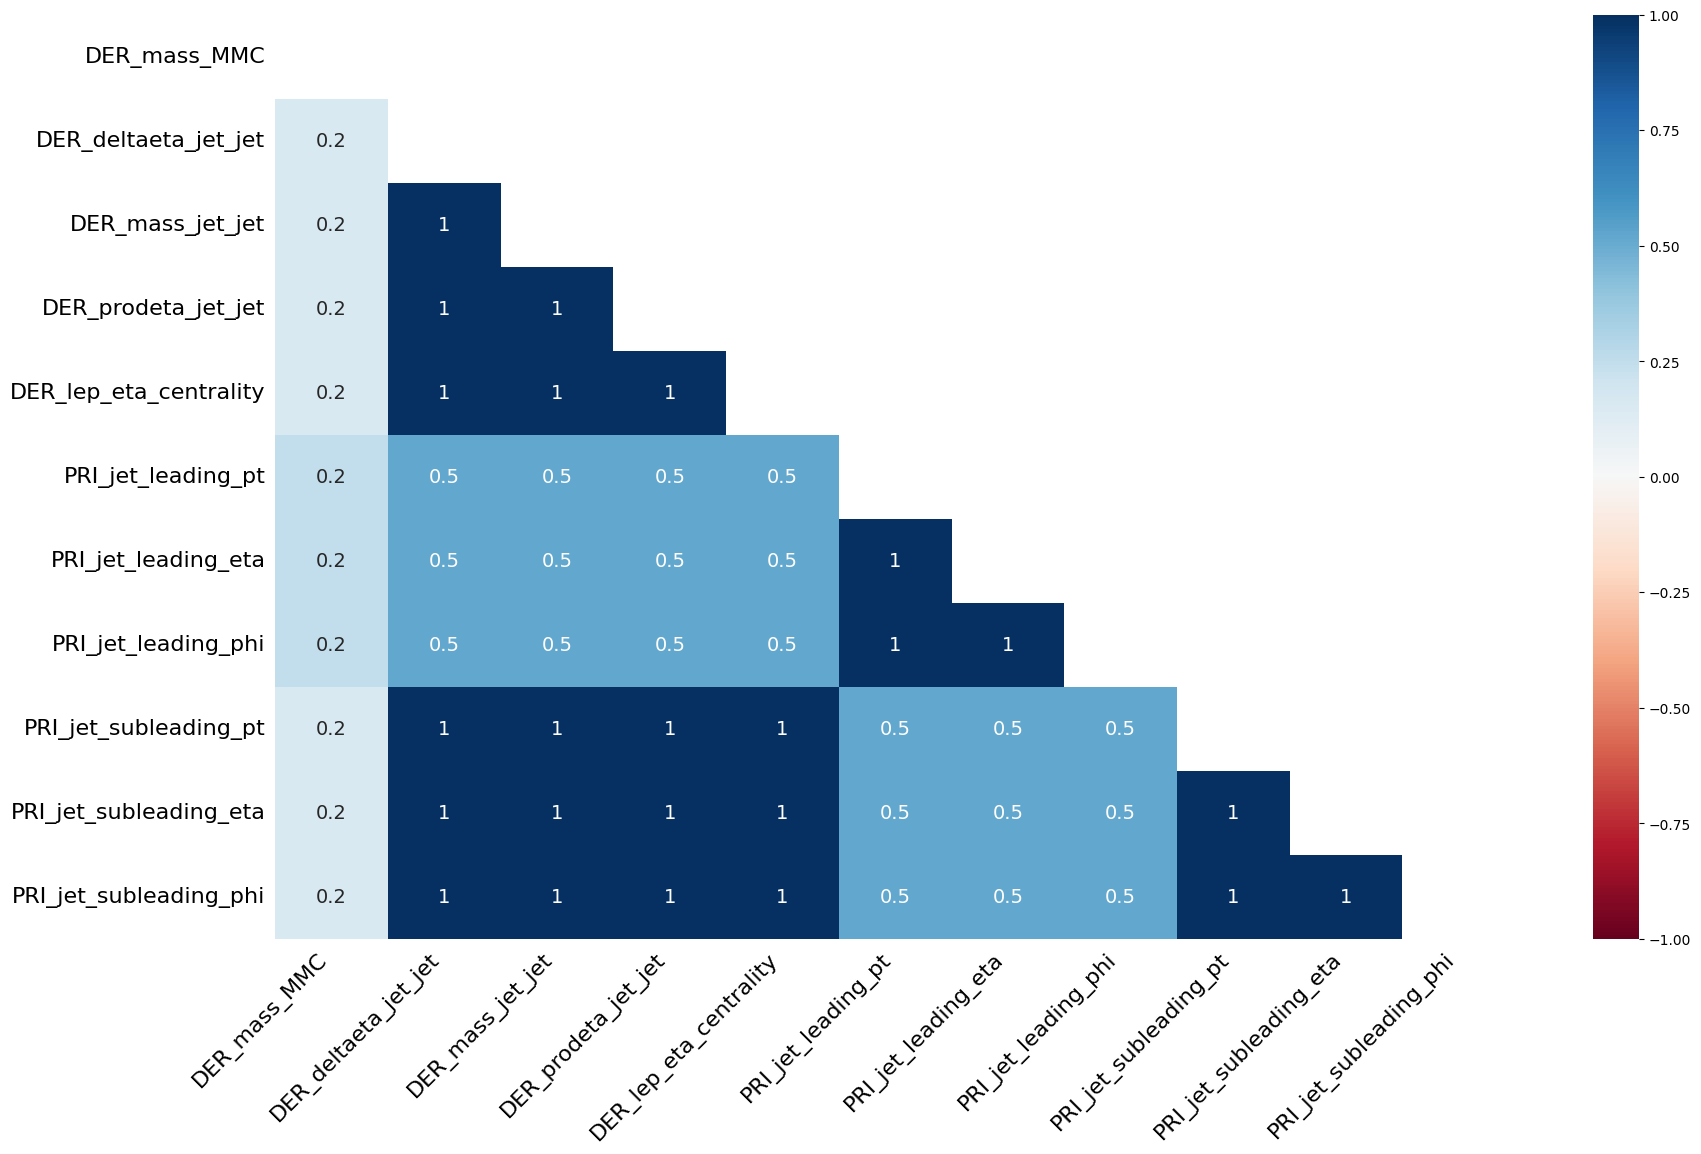

In [30]:
# msno.matrix(higgsdataNAN)
# msno.bar(higgsdataNAN)
msno.heatmap(higgsdataNA)



Figure 1: A heat map showing:
 A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.
So most likely missing values are present where is 1 and 0.2 correpsonds to no correlation or lesser missing values.

<Axes: >

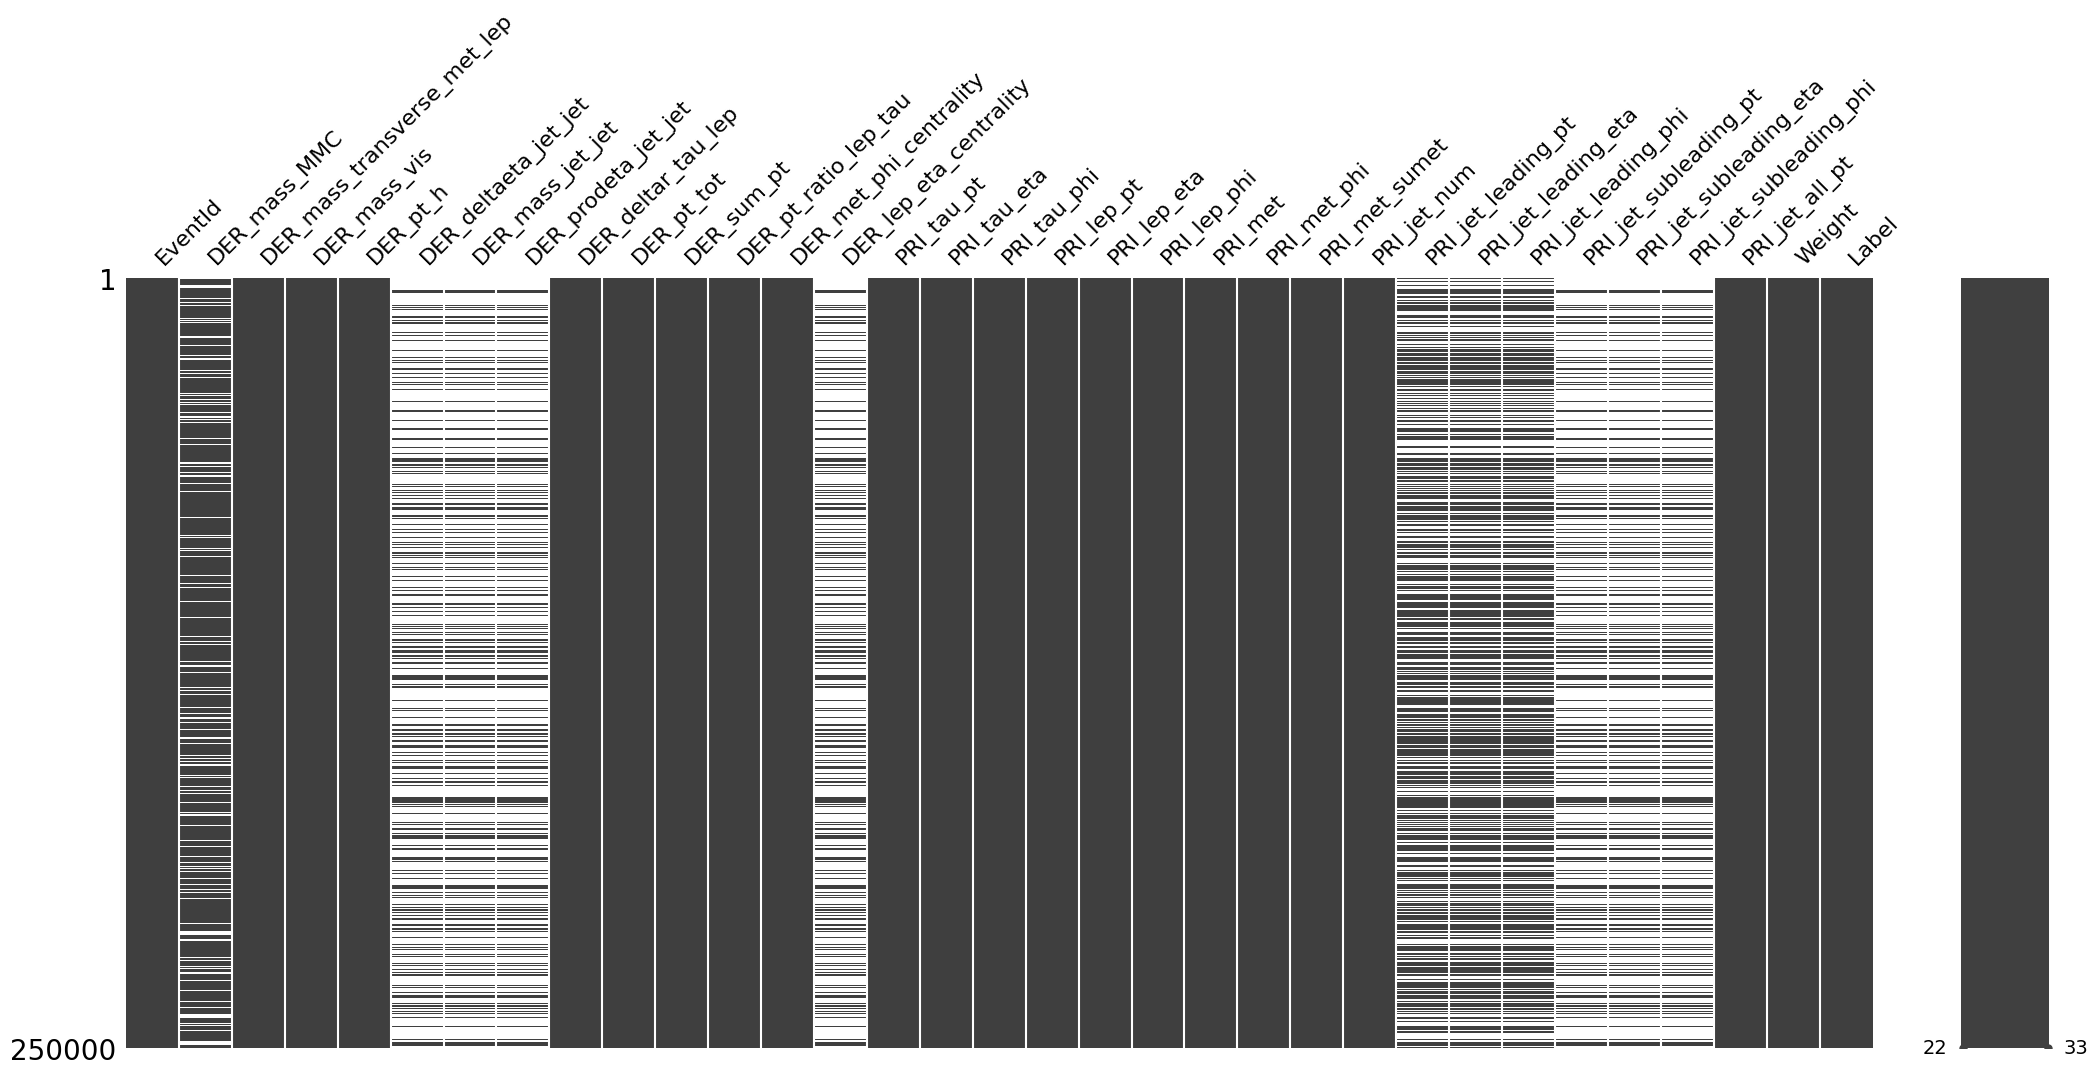

In [31]:
msno.matrix(higgsdataNA)
# msno.bar(higgsdataNAN)
#msno.heatmap(higgsdata)#

Figure 2: A matrix representation to see the missing (-999.000) values in every column.

<Axes: >

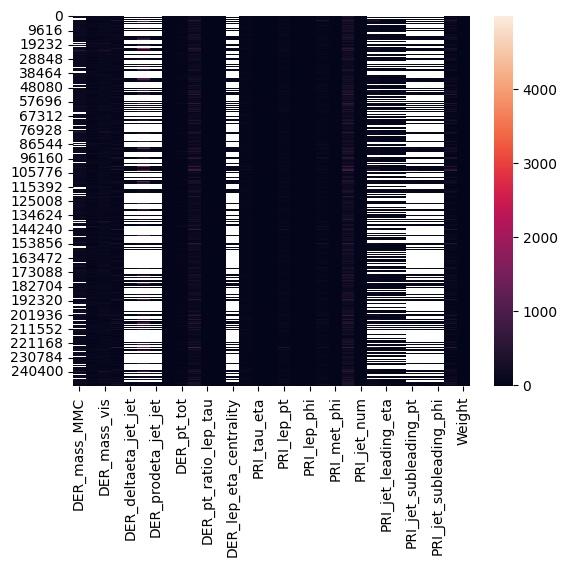

In [32]:
sns.heatmap(higgsdataNA.iloc[:, 1:-1], cbar=True)


Figure 3: just another visualization, heat_map to look for missing values.

In [33]:
higgsdataNA.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,...,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,72168.927986,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,...,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,162499.750000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,...,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,-0.000000,0.018636
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,...,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,287499.250000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,...,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


there are no missing values, but there are some like -999 and to get rid of them we first convert the negative values to nan then dop them.

> Indented block



In [34]:
higgs_dataset = higgsdata

In [35]:
higgs_dataset

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [36]:
higgs_dataset = higgsdata.drop(columns=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','DER_lep_eta_centrality','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'])

In [37]:
higgs_dataset

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,1.392,5.042,55.892,1.258,-1.414,...,31.137,-0.950,0.380,46.520,2.859,144.665,0,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,2.585,22.439,50.618,1.162,-1.345,...,27.202,0.308,1.042,46.737,-0.867,80.408,0,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,2.390,22.183,120.462,1.202,0.529,...,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,3.365,13.504,55.859,0.999,1.414,...,27.915,-0.874,-0.296,12.150,0.811,112.718,0,0.000,1.681611,b


In [38]:
higgs_datanew = higgs_dataset[~higgs_dataset.isin([-999.000]).any(axis=1)]

In [39]:
higgs_datanew

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,...,31.565,-0.884,1.857,40.735,2.237,282.849,3,193.660,0.083414,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,349991,133.457,77.540,88.989,69.650,2.484,2.490,166.396,0.629,-0.084,...,36.831,-1.172,1.749,41.870,-1.073,203.174,1,70.969,0.001502,s
249993,349993,130.075,3.918,66.781,77.369,3.102,49.937,610.482,1.354,-0.634,...,37.052,1.775,-1.689,67.702,-1.768,694.010,3,546.066,0.001503,s
249994,349994,217.020,47.156,62.824,127.953,2.318,3.628,242.586,1.393,1.393,...,39.824,0.700,-0.555,97.737,0.220,271.082,2,174.176,0.064061,b
249997,349997,105.457,60.526,75.839,39.757,2.390,22.183,120.462,1.202,0.529,...,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,0.018636,s


In [40]:
labels = higgs_datanew['Label'].values
weights = higgs_datanew['Weight'].values

In [41]:
labels1 = higgs_datanew['Label']

In [42]:
higgs_datanew.drop(columns=['Label','Weight'],inplace= True)

<ipython-input-42-52e17244cf88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higgs_datanew.drop(columns=['Label','Weight'],inplace= True)


In [43]:
higgs_datanew

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,...,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,193.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,349991,133.457,77.540,88.989,69.650,2.484,2.490,166.396,0.629,-0.084,...,-0.834,-0.711,36.831,-1.172,1.749,41.870,-1.073,203.174,1,70.969
249993,349993,130.075,3.918,66.781,77.369,3.102,49.937,610.482,1.354,-0.634,...,2.403,1.348,37.052,1.775,-1.689,67.702,-1.768,694.010,3,546.066
249994,349994,217.020,47.156,62.824,127.953,2.318,3.628,242.586,1.393,1.393,...,1.094,1.729,39.824,0.700,-0.555,97.737,0.220,271.082,2,174.176
249997,349997,105.457,60.526,75.839,39.757,2.390,22.183,120.462,1.202,0.529,...,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992


In [44]:
from sklearn.model_selection import train_test_split

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [45]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [46]:
#split the train and test set
X_train, X_test, y_train, y_test = train_test_split(higgs_datanew, labels, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=14, min_samples_split=2)

In [47]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [48]:
rf_score_t = rf.score(X_test,y_test)
print("the RF score on testing set is : ", rf_score_t)

the RF score on testing set is :  0.8119120284428782


In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy # how well model is making predictions, but it's not well-suited for data where one class outweighs the other one.

0.8119120284428782

The accuracy check i did was just to see how well it's predicting.

So i tested different max_depths starting from 5-50 and 14 worked the best as the scores are a bit close, still the model is overfitting.

In [50]:
rf_score = rf.score(X_train,y_train)
print("the RF score on training set is : ", rf_score)


the RF score on training set is :  0.8753371089536138


In [51]:
gbt = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state = 42, max_depth = 7)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, random_state=42)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [52]:
y_pred1 = gbt.predict(X_test)
gbt_score_t = gbt.score(X_test,y_test)
print("the GBT score on testing set is : ", gbt_score_t)

the GBT score on testing set is :  0.8022370449611428


In [53]:
gbt_score = gbt.score(X_train,y_train)
print("the GBT score on training set is : ", gbt_score)

the GBT score on training set is :  0.8059398597626753


it is overfitting performing well on training but not testing

In [54]:
np.unique(labels)

array(['b', 's'], dtype=object)

The unique labels for the particles are "s" and "b".

- Produce a confusion matrix for each model and compare them






In [55]:
import matplotlib.pyplot as plt
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["N", "P"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)


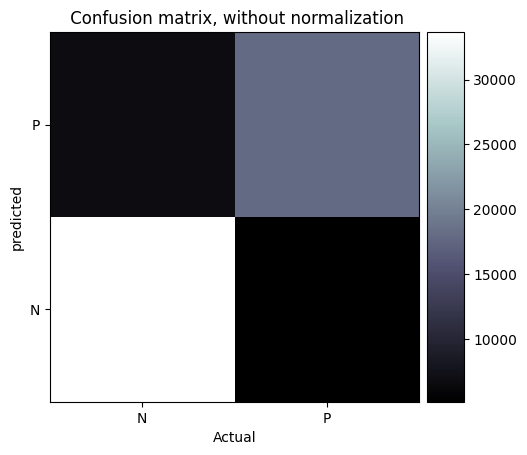

In [56]:
plot_confusion_matrix(y_test, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone)

Figure 4: Confusion matrix for the actual labels and predictions from Random Forest Classifier, where there are maximum true negatives, moderate true positives (off-diagonals) and least false negatives and false positives (diagonals).  So basically the unique labels were 's' and 'b' where s corresponds to the signal(Higgs boson) and b, the background (all other particles), in our case as 's' label is lesser than the background so i decided to assign 's' as the positives and 'b' as the negatives. so the confusion matrix tells us that there are more background particles than the higgs boson.

true positive and true negative is fine
false positive and false negatives are bad but depends on the data and situation

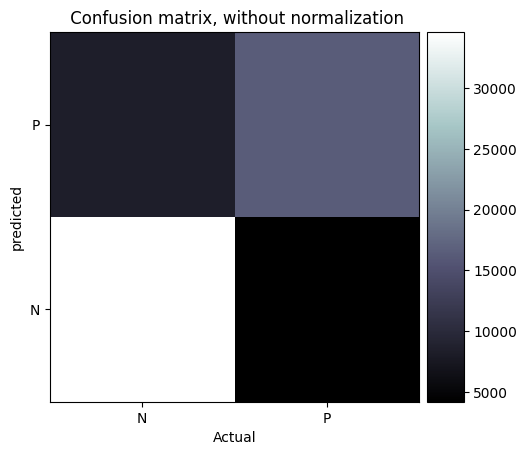

In [57]:
plot_confusion_matrix(y_test, y_pred1,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone)

Figure 5: Confusion matrix for the actual labels and predictions from Gradient Boosting Classifier, where there are maximum true negatives, moderate true positives (off-diagonals) and least false negatives and somewhat shaded false positives (diagonals). If compared to Random Forest the GBT model isn't classying well.

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [58]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgs_datanew, weights, test_size=0.3, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,random_state=42)
rfR.fit(traindata_weights,train_weights)
gbtR = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100, criterion='friedman_mse', min_samples_split=2, max_depth=3, random_state =42)
gbtR.fit(traindata_weights,train_weights)

GradientBoostingRegressor(learning_rate=0.01, random_state=42)

In [60]:
y_pred_rfR = rfR.predict(testdata_weights)
y_pred_gbtR = gbtR.predict(testdata_weights)


In [61]:
train_score_rfR = rfR.score(traindata_weights,train_weights)
test_score_rfR = rfR.score(testdata_weights,test_weights)
train_score_gbtR = gbtR.score(traindata_weights,train_weights)
test_score_gbtR = gbtR.score(testdata_weights,test_weights)

In [62]:
print("Train score for rfR ", train_score_rfR)
print("Test score for rfR ",test_score_rfR)
print("Train score for gbtR ",train_score_gbtR)
print("Test score for gbtR ",test_score_gbtR)

Train score for rfR  0.4321474686638671
Test score for rfR  0.4323266333882896
Train score for gbtR  0.40551431433544627
Test score for gbtR  0.4051753773452459


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate L1 (MAE) and L2 (MSE) losses for test sets

#l1_train = mean_absolute_error(y_train, y_pred_train)
l1_testrf = mean_absolute_error(test_weights, y_pred_rfR)
l1_testgbt = mean_absolute_error(test_weights, y_pred_gbtR)

#l2_train = mean_squared_error(y_train, y_pred_train)
l2_testrf = mean_squared_error(test_weights, y_pred_rfR)
l2_testgbt = mean_squared_error(test_weights, y_pred_gbtR)


print(f"L1 (MAE) Loss - TestRF: {l1_testrf:.2f}, TestGBT: {l1_testgbt:.2f}")
print(f"L2 (MSE) Loss - TestRF: {l2_testrf:.2f}, TestGBT: {l2_testgbt:.2f}")


L1 (MAE) Loss - TestRF: 0.97, TestGBT: 1.06
L2 (MSE) Loss - TestRF: 1.71, TestGBT: 1.79


# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```print``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [64]:
feature_imp = rf.feature_importances_
highes_feat_indx = feature_imp.argsort()[-4:][::-1]#sorts from lowest to highest ( and then flip in ascending order)
highest_feat_names = X_train.columns[highes_feat_indx]
print(highest_feat_names)

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'PRI_tau_pt'],
      dtype='object')


In [65]:
random_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt']}
print(random_grid)


{'n_estimators': [10, 100, 1000], 'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt']}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [66]:
higgsdata.iloc[:, highes_feat_indx]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_sum_pt
0,138.470,51.655,97.827,197.760
1,160.937,68.768,103.235,125.157
2,-999.000,162.172,125.953,197.814
3,143.905,81.417,80.943,75.968
4,175.864,16.915,134.805,57.983
...,...,...,...,...
249995,-999.000,71.989,36.548,55.892
249996,-999.000,58.179,68.083,50.618
249997,105.457,60.526,75.839,120.462
249998,94.951,19.362,68.812,55.859


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=1,
    cv=3
)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [68]:
random_search.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=14),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [69]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 3}
Best score is 0.7823826860841425


In [70]:
df = pd.DataFrame(random_search.cv_results_)


In [71]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.880756,0.388103,0.432334,0.013967,100,auto,3,"{'n_estimators': 100, 'max_features': 'auto', ...",0.781149,0.781735,0.784264,0.782383,0.001352,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [72]:
best_params = random_search.best_params_
best_params

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 3}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


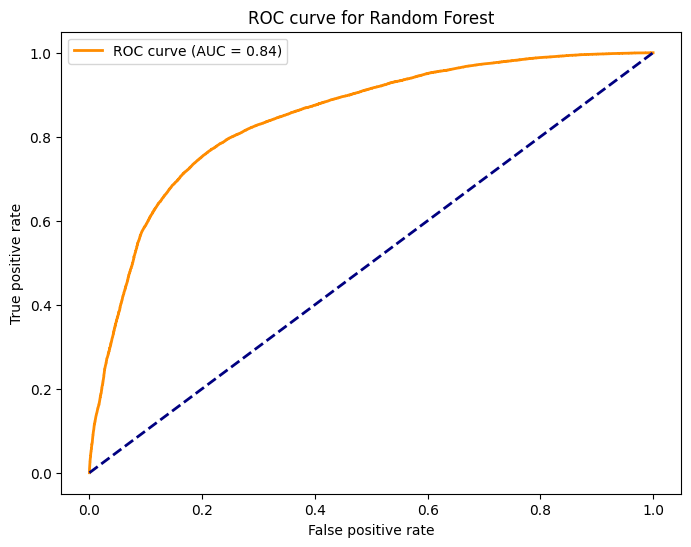

In [75]:
from sklearn.metrics import roc_curve, auc
rf_model = RandomForestClassifier(n_estimators= 100,max_features= 'auto', max_depth= 3, random_state = 42)
rf_model.fit(X_train, y_train=="s")
# The random forest model by itself
y_pred_grd_rfcat = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test=="s", y_pred_grd_rfcat)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc='best')
plt.show()

 Figure 6: The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the performance of a classification model across various thresholds. True Positive Rate (Sensitivity): The proportion of actual positive cases correctly identified by the model.
False Positive Rate: The proportion of actual negative cases incorrectly identified as positive by the model.
The Area Under the ROC Curve (AUC-ROC), a single scalar value quantifies the overall performance of a classifier. It measures the model's ability to distinguish between classes, regardless of the threshold selected. AUC values range from 0 to 1, where higher values (closer to 1) indicate better discrimination ability:
AUC = 1: Perfect classifier, which perfectly separates classes.
AUC ≈ 0.5: Classifier performs no better than random guessing.
AUC < 0.5: Classifier performs worse than random guessing.
A higher AUC generally suggests better predictive performance of the model in terms of distinguishing between classes. The ROC curve and AUC are commonly used to evaluate and compare the performance of different classification models.
In my case the ROC- curve's AUC is 0.84 which suggests that it's performing typically better than just some random guessing.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(higgs_datanew, labels1, test_size=0.3, random_state=42)

In [78]:
random_search.fit(X_train,y_train)
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))
df = pd.DataFrame(random_search.cv_results_)
df

Tuned RF  Parameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': None}
Best score is 0.8106728694714133


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,728.312219,9.843926,17.64215,0.131649,1000,sqrt,None,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.810498,0.811327,0.810194,0.810673,0.000479,1


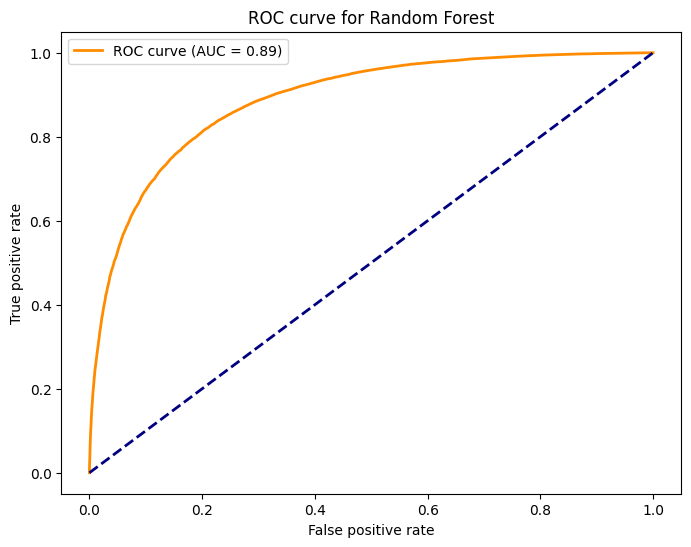

In [84]:
rf_model_label = RandomForestClassifier(n_estimators=1000, max_depth= None, max_features = 'sqrt', random_state = 42)
rf_model_label.fit(X_train, y_train.values.flatten()=="s")
# The random forest model by itself
y_pred_grd_rfcat = rf_model_label.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test.values.flatten()=="s", y_pred_grd_rfcat)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc='best')
plt.show()

Figure 7: Tried another curve just by taking the labels as a pd dataframe instead of numpy array, i suppose it won't make any difference but here are the results, just a slightly different ROC curve with different value for AUC.